# Mapas

[Cartopy](https://scitools.org.uk/cartopy/) es un paquete de Python diseñado para el procesamiento de datos geoespaciales, para su análisis y representación a través de mapas.

Cartopy utiliza las librerías [PROJ.4](https://proj.org/), NumPy and [Shapely](https://shapely.readthedocs.io/) e incluye una interfaz basada en Matplotlib para la creación de mapas de alta calidad.

Para cada Mapa, lo primero es definir la [proyección](https://bl.ocks.org/syntagmatic/ba569633d51ebec6ec6e), que define un sistema coordenado de referencia ([CCRS](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html): Cartopy Coordinate Reference Systems).

### Instalación del módulo Cartopy en AWS/Linux/conda

```bash
$ conda config --set channel_priority false
$ conda update --all --yes
$ conda install -c conda-forge cartopy
```

In [62]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [63]:
import io
from urllib.request import urlopen, Request
from PIL import Image

In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy

import shapely.geometry as sgeom

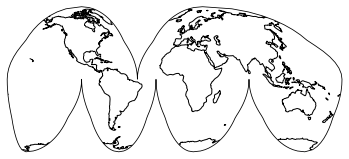

In [65]:
# Crea una nueva figura (usada para el mapa), y la hace activa:
plt.figure()
# Agregar una nueva ventana (ejes) a la figura, definiendo el tipo de proyección que se utilizará 
ax = plt.axes(projection = ccrs.InterruptedGoodeHomolosine())
# Define que en esta ventana se usen bordes de las costas
ax.coastlines()
# plt.savefig('coastlines.pdf')  # Grabar el mapa (o en .png) ANTES de plt.show()
# Muestra la figura (mapa) embebida en el notebook
plt.show()
# Cierra la figura, asi se libera la memoria
plt.close()

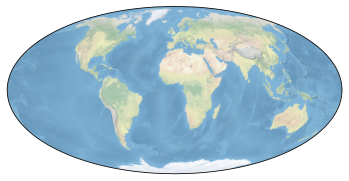

In [66]:
plt.figure()
ax = plt.axes(projection = ccrs.Mollweide())
# Define que en esta ventana se usen imágenes 
# las imágenes son de https://www.naturalearthdata.com/downloads/50m-raster-data/50m-natural-earth-2/
ax.stock_img()
plt.show()
plt.close()

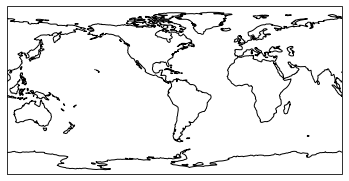

In [67]:
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = -74))
ax.coastlines()

plt.show()
plt.close()

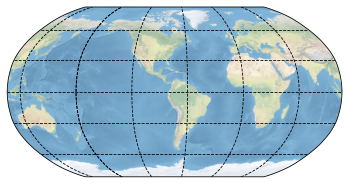

In [68]:
plt.figure()
ax = plt.axes(projection = ccrs.Robinson(central_longitude = -74))
ax.stock_img()

ax.gridlines(color='black', linestyle='--')

plt.show()
plt.close()

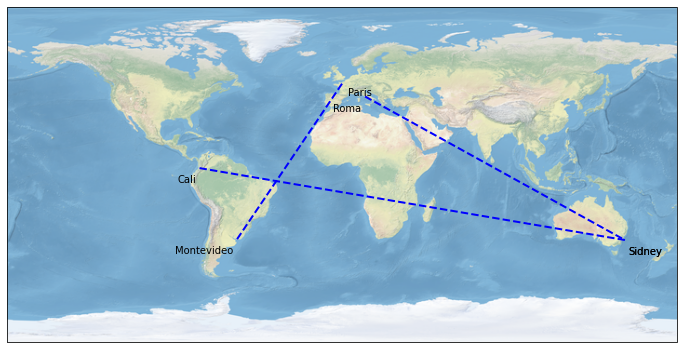

In [69]:
# Crea una nueva figura, definiendo un tamaño diferente al default: [6.4, 4.8]
plt.figure(figsize = [12, 9])
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()

 

cali = 3.39, -76.59, "Cali" # lat, lon, nombre
roma = 41.90, 12.39, "Roma"
paris = 50.18, 0.96, "Paris"
montevideo = -34.82, -56.41, "Montevideo"
sidney = -35.29,152.09, "Sidney"

 

def vuelo(cdd1, cdd2, color='blue', align='right'):
   plt.plot([cdd1[1], cdd2[1]], [cdd1[0], cdd2[0]],
      color = color, linewidth = 2, linestyle = '--',
      transform = ccrs.PlateCarree())
   plt.text(cdd1[1] - 2, cdd1[0] - 8, cdd1[2],
      horizontalalignment = align,
      transform = ccrs.PlateCarree())
   plt.text(cdd2[1] + 2, cdd2[0] - 8, cdd2[2],
      horizontalalignment = 'left',
      transform = ccrs.Geodetic())

 

vuelo(cali, sidney)
vuelo(roma, sidney)
vuelo(montevideo, paris)

 

plt.show()
    


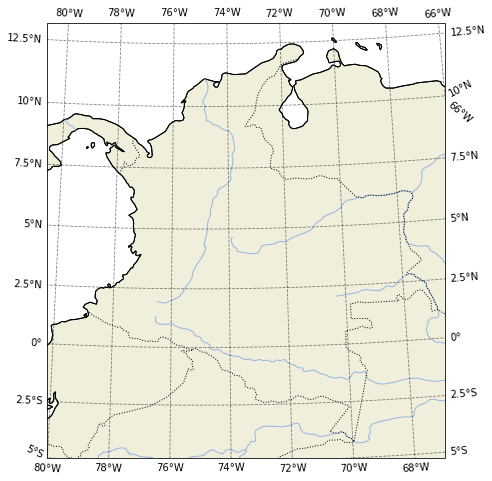

In [70]:
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = ccrs.AlbersEqualArea(-75, 7.5))
ax.set_extent([-80, -67, -5, 13])

ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, edgecolor = 'black')
# ax.add_feature(cf.OCEAN)
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.BORDERS, linestyle=':')

ax.gridlines(draw_labels = True, color = 'black', alpha = 0.5, linestyle = '--')

plt.show()
plt.close()

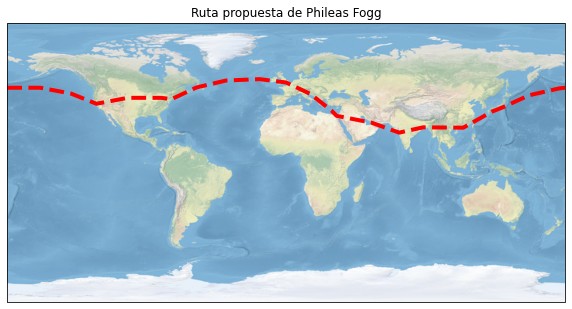

In [71]:
plt.figure(figsize = [10, 8])
ax = plt.axes(projection = ccrs.PlateCarree())
# ax.coastlines()

ax.stock_img()
ax.set_title("Ruta propuesta de Phileas Fogg")

places = {
    'londres': [-0.1276474, 51.5073219],
    'suez': [32.537086, 29.974498],
    'bombay': [72.8882172, 19.1334321],
    'calcuta': [88.3476023, 22.5677459],
    'hong kong': [114.1628131, 22.2793278],
    'yokohama': [139.636768, 35.444991],
    'san francisco': [-122.4629897, 37.7647993],
    'new york': [-73.9866136, 40.7306458]}

destinations = [
    'londres', 'suez', 'bombay', 'calcuta', 'hong kong',
    'yokohama', 'san francisco', 'new york', 'londres']

lons, lats = zip( *[ (places[place][0], places[place][1]) for place in destinations ] )

ax.plot(lons, lats,
        linestyle = '--', color = 'red', linewidth = 4,
        transform = ccrs.Geodetic())

plt.show()
plt.close()

In [72]:
ciudades = {   'Arauca': [ -70.7561787, 7.0761716],   
            'Armenia': [ -75.7155692, 4.5422707],   
            'Barranquilla': [ -74.8393042, 10.9843155],   
            'Bogota': [ -74.2057915, 4.6447977],  
            'Bucaramanga': [ -73.1679976, 7.1192047],  
            'Cali': [ -76.5957045, 3.3950619],   
            'Cartagena': [ -75.543545, 10.4001968],   
            'Cucuta': [ -72.5394401, 7.9087586],  
            'Florencia': [ -75.6213516, 1.6188689],  
            'Ibague': [ -75.2217971, 4.4122887],  
            'Inirida': [ -67.9326713, 3.8682975],   
            'Leticia': [ -69.9599657, -4.2031648],  
            'Manizales': [ -75.5536839, 5.0686937], 
            'Medellin': [ -75.6512524, 6.2441988],   
            'Mitu': [ -70.2511272, 1.2521739],   
            'Mocoa': [ -76.6598098, 1.1523405],  
            'Monteria': [ -75.9169897, 8.7605469], 
            'Neiva': [ -75.3074082, 2.9376189],  
            'Pasto': [ -77.3122422, 1.2135252],  
            'Pereira': [ -75.7487812, 4.8047737],  
            'Popayan': [ -76.6349537, 2.4573845],  
            'Puerto Carreno': [ -67.5059717, 6.1847657],  
            'Quibdo': [ -76.6628026, 5.6956327], 
            'Riohacha': [ -72.9321659, 11.5344405], 
            'San Andres': [ -81.7226636, 12.576692], 
            'San Jose del Guaviare': [ -72.6563816, 2.5693494], 
            'Santa Marta': [ -74.2174167, 11.2315232],  
            'Sincelejo': [ -75.429849, 9.2921896],  
            'Tunja': [ -73.3912607, 5.539293], 
            'Valledupar': [ -73.2932691, 10.4645041],  
            'Villavicencio': [ -73.6791009, 4.1247544],  
            'Yopal': [ -72.4085107, 5.3327952]
           }

In [73]:
#Vamos a insertar en el diccionario  (valor) un datos aleatorios 10 y 150
for ciudad, ubicacion in ciudades.items():
    ubicacion.append(np.random.randint(5,50))
    

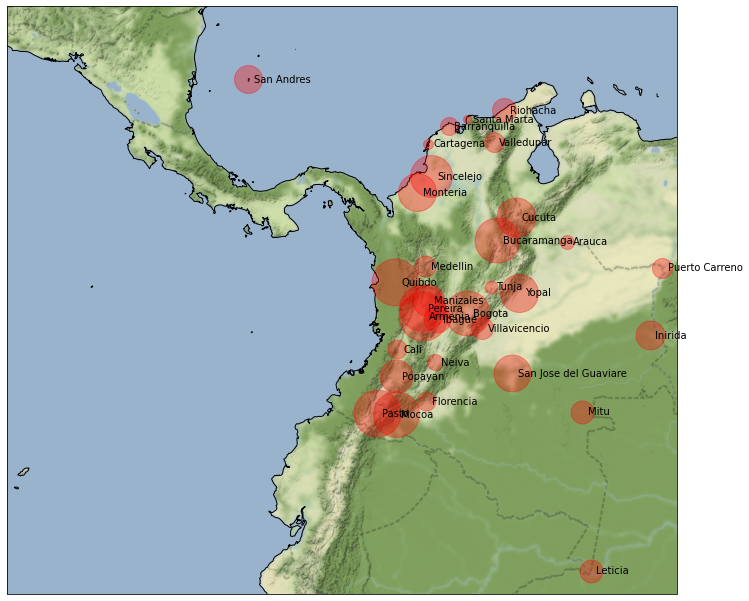

In [74]:
from cartopy.io.img_tiles import Stamen

 

tiler = Stamen('terrain-background')
mercator = tiler.crs

 

plt.figure(figsize = (12, 16))
ax = plt.axes(projection=mercator)
ax.set_extent([-90, -67, -5, 15])
ax.add_image(tiler, 6)
ax.coastlines('10m')

 

#pintar ciudades con sus nombres
for ciudad, ubicacion in ciudades.items():
    longitud, latitud, valor = ubicacion
    plt.plot(
        longitud, latitud,
        color = 'red', marker='o', markersize=valor, alpha=0.33,
        transform=ccrs.PlateCarree()
    )
    plt.text(
        longitud+0.2, latitud-0.1, ciudad,
        color='black',
        transform=ccrs.PlateCarree()
    )
plt.show()
plt.close()